In [1]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import numpy as np
import plotly.express as px
#import bamboolib

In [2]:
import os
current_directory = os.getcwd()
print("Current directory : ", current_directory)

aymeric =  "/home/aymeric/python-scripts/espadon/data/" #aymeric
jp = '~/Dropbox/Mac/Desktop/CRD Anses/all3/' # Jean Philippe
jp_index = '~/Dropbox/Mac/Desktop/CRD Anses/code/indexation_results/' # Jean Philippe index

if 'aymeric' in current_directory:
    path_base = aymeric

elif 'Mac' in current_directory:
    path_base = jp
elif 'd:/Projects' in current_directory:
    path_base = "d:/Projects/Medialab/"

print("Path base : ", path_base)

Current directory :  /home/aymeric/python-scripts/espadon/my-espadon-notebook
Path base :  /home/aymeric/python-scripts/espadon/data/


In [3]:

dic_id={}
for x in [x for x in pd.read_csv(glob.glob(f'{path_base}sm/*.csv')[0]).columns if 'id' in x]:
    dic_id[x]=str



In [4]:
df0= pd.read_csv(f"{path_base}corpus_tweets.csv", sep = ",", dtype = dic_id)

/home/aymeric/anaconda3/envs/analyse_tweets/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,8,10,22,28,29,30,32,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


KeyboardInterrupt: 

In [5]:

#users = pd.read_csv('../outcome/user_sm_predicted.csv',dtype=dic_id) #jean-philippe
users = pd.read_csv(f'{path_base}recoded_user_sm_predicted.csv',dtype=dic_id)


In [6]:
df0 = df0[['query', 'id', 'timestamp_utc', 'local_time',
           'user_screen_name', 'text',  'user_location',  'user_id', 'user_name',
           'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK',
           'BRAF', 'MET', 'RET', 'HER2', 'date']]

In [7]:
df0['date'] = pd.to_datetime(pd.to_datetime(df0['date']).dt.date)
df0['Year'] = df0['date'].dt.year


In [8]:
df=df0.merge(users,on=['user_id'], how = "inner")#how = inner by default


In [10]:
def time_series(time_length, x, what):
    if what == "user_id":
        df_user = df.drop_duplicates(subset = [time_length, "user_id"])
        timeseries = df_user.groupby([time_length, x]).agg(nb_user_by_group = ("user_id", "count")).reset_index()
        dfdate = df_user.groupby([time_length]).agg(nb_user = ("user_id", "count")).reset_index()
        timeseries = timeseries.merge(dfdate, on = [time_length], how = "left")
        timeseries["prop"] = timeseries["nb_user_by_group"]/timeseries["nb_user"]*100
    elif what == "id":
        df_user = df.drop_duplicates(subset = [time_length, "user_id"])
        time_author = df_user.groupby([time_length, x]).agg(nb_user_by_group = ("user_id", "count")).reset_index()
        timeseries = df.groupby([time_length, x]).agg(nb_tweets_by_group = ("id", "count")).reset_index()
        
        dfdate = df.groupby([time_length]).agg(nb_tweets = ("id", "count")).reset_index()
        timeseries = timeseries.merge(dfdate, on = [time_length], how = "left")
        timeseries = timeseries.merge(time_author.drop(columns = [x]), on = [time_length], how = "left")
        timeseries["prop"] = timeseries["nb_tweets_by_group"]/timeseries["nb_tweets"]*100
        timeseries["average_publication"] = timeseries["nb_tweets_by_group"]/timeseries["nb_user_by_group"]
        
    
    
    return(timeseries)

# Quelques graphiques

Les différents graphiques qui suivent donne un aperçu de la distribution dans le temps des rôles et des références aux différents biomarqueurs.

## Des professionnels de plus en plus présents

L'analyse de la distribution des rôles montre la présence croissante des professionnels, en particulier des oncologues (*oncologists*) et, dans une moindre, des chercheurs. Alors que les oncologues représentent un peu moins de 5% des comptes en 2012, ils constituent environ 27% des comptes en 2020. La part des professionnel de santé (*health professional*) semble quant à elle relativement stable dans le temps. La proportion de comptes jouant les rôles de patients, c'est-à-dire les *survivors* et les *cancer patient*, ne dépasse pas les 10% sur toutes la périodes. On observe également une faible représentation des "défenseurs de causes" (*advocacy*). Rappelons toutefois que cette catégorie comprend les comptes qui ne jouent pas d'autres rôles. Par exemple, un "survivant" qui a été annoté également comme un défenseur de cause (*advocacy*) sera compté parmi les patients et non les *advocacy*.


In [35]:
time_length = "Year"
x = "User_role2"
what = "user_id"

if x == "User_status":
    Y= 'nb_user_by_group'
elif x == "id":
    Y= "nb_tweets_by_group"

dftime = time_series(time_length, x, what)
#plot_time_serie = px.line(dftime, x=time_length, y= Y, color= x)
area_time_serie = px.area(dftime, x=time_length, y='prop', color= x, pattern_shape= x,
                         title = "Proportion de comptes par rôle et par an")#, line_group="country")
area_time_serie

Les deux diagrammes ci-dessous représentent respectivement la proportion de comptes et de tweets par statut et par an. Les "statuts" correspondent aux modalités de la variable *User_status*. On voit ainsi que les médias constituent moins de 10% des comptes en 2021, mais sont à l'origine de plus de 25% des tweets à la même époque.

````{margin}
```{note}
La variable *User_status* est une "réduction" de la variable *User_role2*. Ainsi, la modalité "Health professionals" regroupe les rôles d'oncologues, de chercheurs et de professionnels de la santé (hors médecins).
```
````

In [36]:
time_length = "Year"
x = "User_status"
what = "user_id"

if x == "User_status":
    Y= 'nb_user_by_group'
elif x == "id":
    Y= "nb_tweets_by_group"

dftime = time_series(time_length, x, what)
area_time_serie = px.area(dftime, x=time_length, y='prop', color= x, pattern_shape= x,
                         title = "Proportion de comptes par statuts et par an")#, line_group="country")
area_time_serie

In [37]:
dftime = time_series(time_length, x, 'id')
area_time_serie = px.area(dftime, x=time_length, y='prop', color= x, pattern_shape= x,
                         title = "Proportion de tweets par statuts et par an")#, line_group="country")
area_time_serie

<AxesSubplot:xlabel='Year', ylabel='prop'>

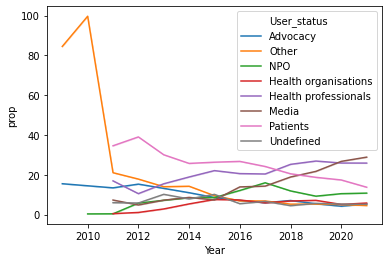

In [135]:
sns.lineplot(x = 'Year', y = "prop", data = dftime, hue = x)

Text(0.5, 0.98, 'Proportion de tweets par statuts et par an')

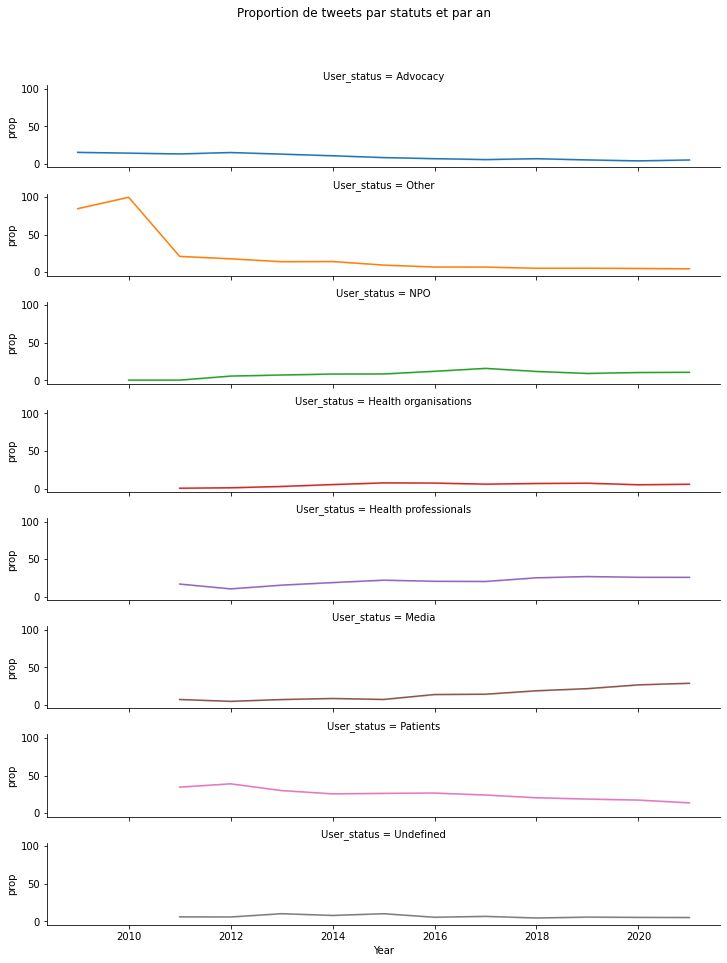

In [163]:
import seaborn as sns
dftime = time_series(time_length, x, 'id')

g = sns.FacetGrid(dftime, row= x, hue = x,
                  height=1.7, aspect=6,)

g.map(sns.lineplot, "Year", "prop")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Proportion de tweets par statuts et par an')

In [144]:
biom=['ROS1', 'ALK','EXON', 'EGFR','KRAS','NTRK','BRAF',"MET",'RET',"HER2"]#
for i,bio in enumerate(biom):
    
    df_tmp = df.loc[(df[bio] == 1)& (df["Year"] >= 2012)]
    #print(i, bio, len(df_tmp))
    df_tmp = df_tmp.groupby(["Year", bio]).agg(nb_tweet_on_biomarker = ("id", "count")).reset_index()
    dfdate = df.groupby(["Year"]).agg(nb_tweet = ("id", "count")).reset_index()
    df_tmp = df_tmp.merge(dfdate, on = ["Year"], how = "left")
    df_tmp["biomarker"] = bio
    df_tmp = df_tmp.drop(columns = [bio])
    df_tmp["prop_of_biom"] = df_tmp["nb_tweet_on_biomarker"]/df_tmp["nb_tweet"]*100
    
    #sns.lineplot( x = 'Year', y = "prop_of_biom", data = df_tmp)
    
    if i==0:
        biomm=df_tmp
    else:
        biomm=pd.concat([biomm,df_tmp])
 

## La dynamique des biomarqueurs

Les diagrammes ci-dessous donnent la proportion de tweets contenant chacun des biomarqueurs par an et par mois respectivement, sachant qu'un tweet peut contenir plusieurs biomarqueurs. Ainsi, en 2018, le biomarqueur ALK était présent dans près 1,5% des tweets. Puis en janvier 2021, le biomarqueur EGFR était présent dans 3% des tweets.

In [148]:
fig = px.line(biomm, x="Year", y="prop_of_biom", color='biomarker',
             title="Proportion de tweets par an contenant chacun des biomarqueurs")#, line_group="country")

#fig.layout.yaxis.tickformat = ',.0%'
fig.write_html("biomarkers_time.html")
fig

Text(0.5, 0.98, 'Proportion de tweets par an contenant chacun des biomarqueurs')

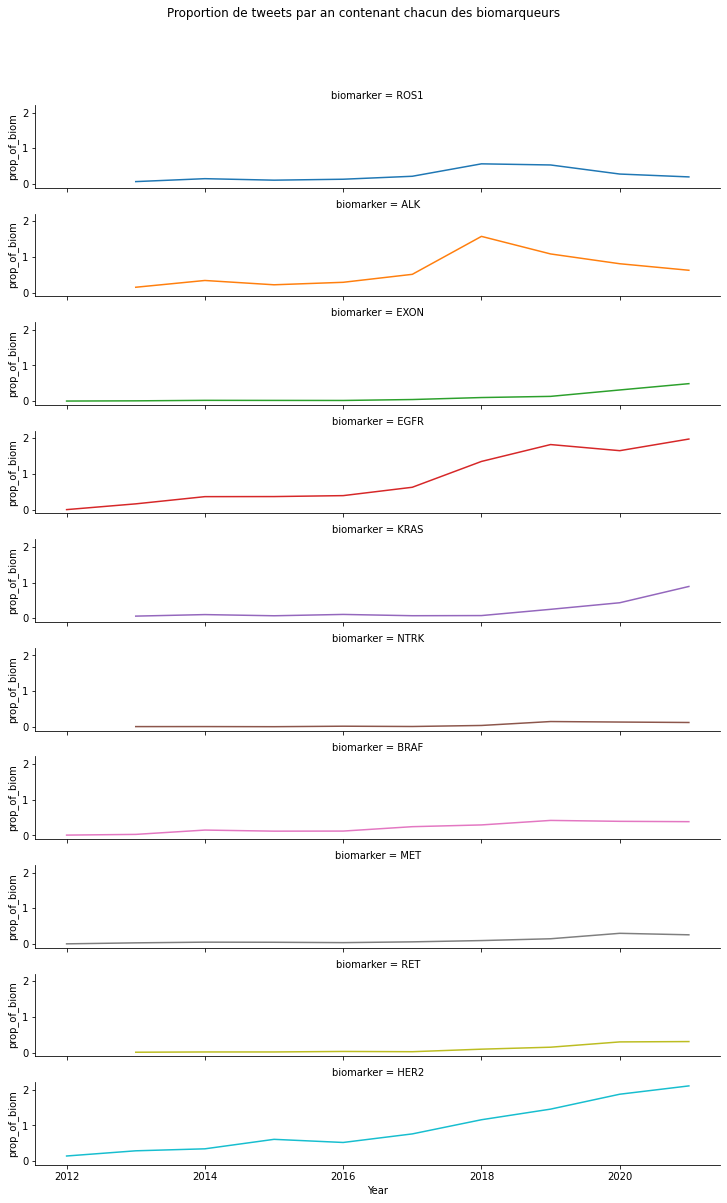

In [160]:

g = sns.FacetGrid(biomm, row= 'biomarker', hue = 'biomarker',
                  height=1.7, aspect=6)

g.map(sns.lineplot, "Year", "prop_of_biom")
g.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
g.fig.suptitle('Proportion de tweets par an contenant chacun des biomarqueurs')

In [28]:
dfc=df.copy()
dfc.index=df['date']#.resample
dfc=dfc[dfc.date>'01-01-2012']

In [164]:


tr='1m'
total=dfc.resample(tr)['id'].count()

for i,bio in enumerate(biom):
    collective_permonth=(dfc[dfc[bio]==1].resample(tr)['id'].count()/total*100).reset_index()
    collective_permonth['category']=bio

    if i==0:
        biomm=collective_permonth
    else:
        biomm=pd.concat([biomm,collective_permonth])


import plotly.express as px
fig = px.area(biomm, x="date", y="id",color='category',pattern_shape="category", 
              pattern_shape_sequence=[".", "x", "+"],
             title="Proportion de tweets contenant chacun des biomarqueurs par mois")#, line_group="country")
#fig.layout.yaxis.tickformat = ',.0%'
fig.write_html("biomarkers_time.html")



fig.show()

## Qui parle de quel marqueur ?

Enfin, la matrice ci-après indique la part occupée par les différents biomarqueurs dans les tweets qui en mentionnent au moins un en fonction du statut de leurs auteurs. Par exemple, 30% des 2548 biomarqueurs cités par les "défenseurs de cause" (*advocacy*) concernent le marqueur EGFR. 

In [165]:
df_status = df[["User_status", "id", 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]
df_tmp = df_status.loc[df_status["ALK"]==1].groupby(["User_status", "ALK"]).agg(ALK_c = ("id", "count"))

In [166]:
biom = ['ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']
variable = "User_status"
df_status = df[[variable, "id", 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]


for i, bio in enumerate(biom):
    df_tmp = df_status.loc[df_status[bio]==1].groupby([variable, bio]).agg(bio = ("id", "count")).reset_index()
    df_tmp = df_tmp[[variable,"bio"]].rename(columns = {"bio": bio})
    
    if i==0:
        pivot_table = df_tmp
    else:
        pivot_table = pivot_table.merge(df_tmp, how = "left", on = [variable]) 

pivot_table["somme_ligne"] = pivot_table[biom].sum(axis=1)
pivot_table.loc['Column_Total']= pivot_table.sum(numeric_only=True, axis=0)
pivot_table = pivot_table.fillna("Total")

df_tmp = pivot_table.copy()
biom.append("somme_ligne")
for i, status in enumerate(pivot_table[variable]):
    for i, bio in enumerate(biom):
        df_tmp[bio] = pivot_table[bio]/pivot_table["somme_ligne"]*100
    
pivot_table = df_tmp[[variable, 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]
pivot_table.index = pivot_table[variable]
pivot_table = pivot_table.drop(columns = [variable])

In [167]:
biom = ['ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']
variable = "User_status"
df_status = df[[variable, "id", 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2']]


for i, bio in enumerate(biom):
    df_tmp = df_status.loc[df_status[bio]==1].groupby([variable, bio]).agg(bio = ("id", "count")).reset_index()
    df_tmp = df_tmp[[variable,"bio"]].rename(columns = {"bio": bio})
    
    if i==0:
        pivot_table1 = df_tmp
    else:
        pivot_table1 = pivot_table1.merge(df_tmp, how = "left", on = [variable]) 

pivot_table1["somme_ligne"] = pivot_table1[biom].sum(axis=1)


df_tmp = pivot_table1.copy()
biom.append("somme_ligne")
for i, status in enumerate(pivot_table1[variable]):
    for i, bio in enumerate(biom):
        df_tmp[bio] = pivot_table1[bio]#/pivot_table["somme_ligne"]*100
    
pivot_table1 = df_tmp[[variable, 'ROS1', 'ALK', 'EXON', 'EGFR', 'KRAS', 'NTRK', 'BRAF', 'MET', 'RET', 'HER2', 'somme_ligne']]
pivot_table1.index = pivot_table1[variable]
pivot_table1 = pivot_table1.drop(columns = [variable])
pivot_table1.loc['Column_Total']= pivot_table1.sum(numeric_only=True, axis=0)

pivot_table1_style = pivot_table1.style.format(precision=0, na_rep='')\
.set_caption("Les nombre de références aux biomarqueurs en fonction du statut des auteurs")\
 .set_table_styles([{
     'selector': 'caption',
     'props': 'caption-side: top ; color: black ; font-size : 14pt'
 }], overwrite=False)

pivot_table1_style

,ROS1,ALK,EXON,EGFR,KRAS,NTRK,BRAF,MET,RET,HER2,somme_ligne
User_status,,,,,,,,,,,
Advocacy,278,451,93,780,398,51,63,97,94,243,2548
Health organisations,247,559,65,431,108,27,82,61,40,552,2172
Health professionals,713,1672,602,3725,913,267,936,561,529,3284,13202
Media,345,1396,351,1985,458,118,892,268,292,4187,10292
NPO,315,657,110,1077,173,57,228,117,107,1501,4342
Other,114,135,9,190,24,6,28,18,7,355,886
Patients,789,2043,173,2557,385,78,450,146,112,1129,7862
Undefined,42,127,23,210,61,26,50,23,12,238,812
Column_Total,2843,7040,1426,10955,2520,630,2729,1291,1193,11489,42116


In [168]:
fig = px.imshow(pivot_table,color_continuous_scale='reds', title = "Proportion des références aux différents biomarqueurs en fonction du statut des auteurs")
fig.show()

[Text(0.5, 1.0, 'Proportion des références aux différents biomarqueurs en fonction du statut des auteurs')]

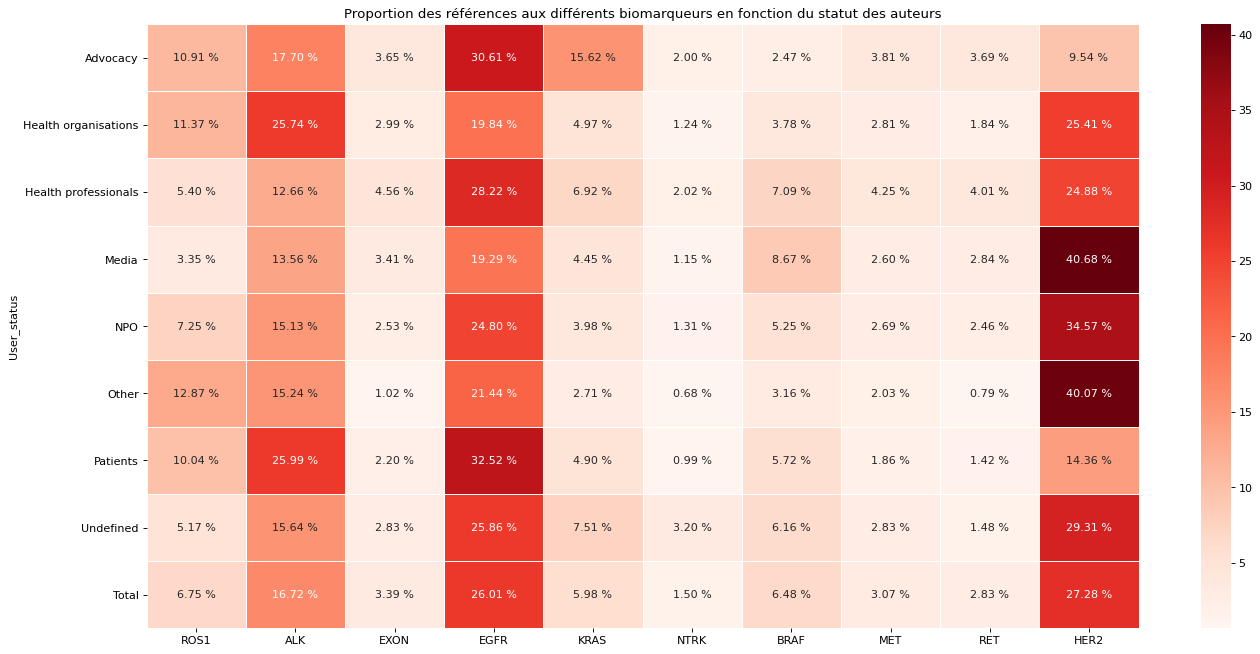

In [179]:
import seaborn as sns 
from matplotlib.colors import LogNorm, Normalize

fig = plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

cpalette = sns.color_palette("GnBu_d")
res = sns.heatmap(pivot_table, annot=True, linewidths=.5, fmt='.2f',  cmap="Reds")

for t in res.texts: t.set_text(t.get_text() + " %")
#plt.savefig('biomarkers_dist.pdf')
res.set(title ="Proportion des références aux différents biomarqueurs en fonction du statut des auteurs")